In [2]:
%matplotlib inline
import copy
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import torch
from dsets_classification import getCandidateInfoList, getCt, LunaDataset
from util.util import xyz2irc


candidateInfo_list = getCandidateInfoList(requireOnDisk_bool=False)
candidateInfo_list[0]

CandidateInfoTuple(isNodule_bool=True, hasAnnotation_bool=True, isMal_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(67.82725575, 85.37992457, -109.74672379999998))

In [3]:
from vis import findPositiveSamples, showCandidate
positiveSample_list = findPositiveSamples()

2022-07-25 00:59:59,447 INFO     pid:28516 dsets_classification:295:__init__ <dsets_classification.LunaDataset object at 0x7f02cd081ac0>: 550896 training samples, 549714 neg, 1182 pos, unbalanced ratio


0 CandidateInfoTuple(isNodule_bool=True, hasAnnotation_bool=True, isMal_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(67.82725575, 85.37992457, -109.74672379999998))
1 CandidateInfoTuple(isNodule_bool=True, hasAnnotation_bool=True, isMal_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(47.67105722, 37.64251989, -99.89039388))
2 CandidateInfoTuple(isNodule_bool=True, hasAnnotation_bool=True, isMal_bool=True, diameter_mm=27.44242293, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.943403138251347598519939390311', center_xyz=(-46.94966448, 72.63645381, -95.64452131))
3 CandidateInfoTuple(isNodule_bool=True, hasAnnotation_bool=True, isMal_bool=True, diameter_mm=27.07544345, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.481278873893653517789960724156', center_xyz=(-103.13251120000001, -5.774672551, -206.3554703))
4 CandidateInfoTuple(is

In [4]:
augmentation_dict = {}
augmentation_list = [
    ('None', {}),
    ('flip', {'flip': True}),
    ('offset', {'offset': 0.1}),
    ('scale', {'scale': 0.2}),
    ('rotate', {'rotate': True}),
    ('noise', {'noise': 25.0}),    
]
ds_list = [
    LunaDataset(sortby_str='label_and_size', augmentation_dict=augmentation_dict) 
    for title_str, augmentation_dict in augmentation_list
]

all_dict = {}
for title_str, augmentation_dict in augmentation_list:
    all_dict.update(augmentation_dict)
all_ds = LunaDataset(sortby_str='label_and_size', augmentation_dict=all_dict)

# augmentation_list.extend([('All', augmentation_dict)] * 3)
ds_list.extend([all_ds] * 3)



2022-07-25 01:00:03,646 INFO     pid:28516 dsets_classification:295:__init__ <dsets_classification.LunaDataset object at 0x7f02ca337760>: 550896 training samples, 549714 neg, 1182 pos, unbalanced ratio
2022-07-25 01:00:03,797 INFO     pid:28516 dsets_classification:295:__init__ <dsets_classification.LunaDataset object at 0x7f037c080040>: 550896 training samples, 549714 neg, 1182 pos, unbalanced ratio
2022-07-25 01:00:03,949 INFO     pid:28516 dsets_classification:295:__init__ <dsets_classification.LunaDataset object at 0x7f037c0b8a30>: 550896 training samples, 549714 neg, 1182 pos, unbalanced ratio
2022-07-25 01:00:04,103 INFO     pid:28516 dsets_classification:295:__init__ <dsets_classification.LunaDataset object at 0x7f037c0b8400>: 550896 training samples, 549714 neg, 1182 pos, unbalanced ratio
2022-07-25 01:00:04,268 INFO     pid:28516 dsets_classification:295:__init__ <dsets_classification.LunaDataset object at 0x7f037c0b8dc0>: 550896 training samples, 549714 neg, 1182 pos, unbalan

torch.Size([1, 32, 48, 48]) (tensor([0, 1]), 1, '1.3.6.1.4.1.14519.5.2.1.6279.6001.227968442353440630355230778531', tensor([219, 331, 156]))


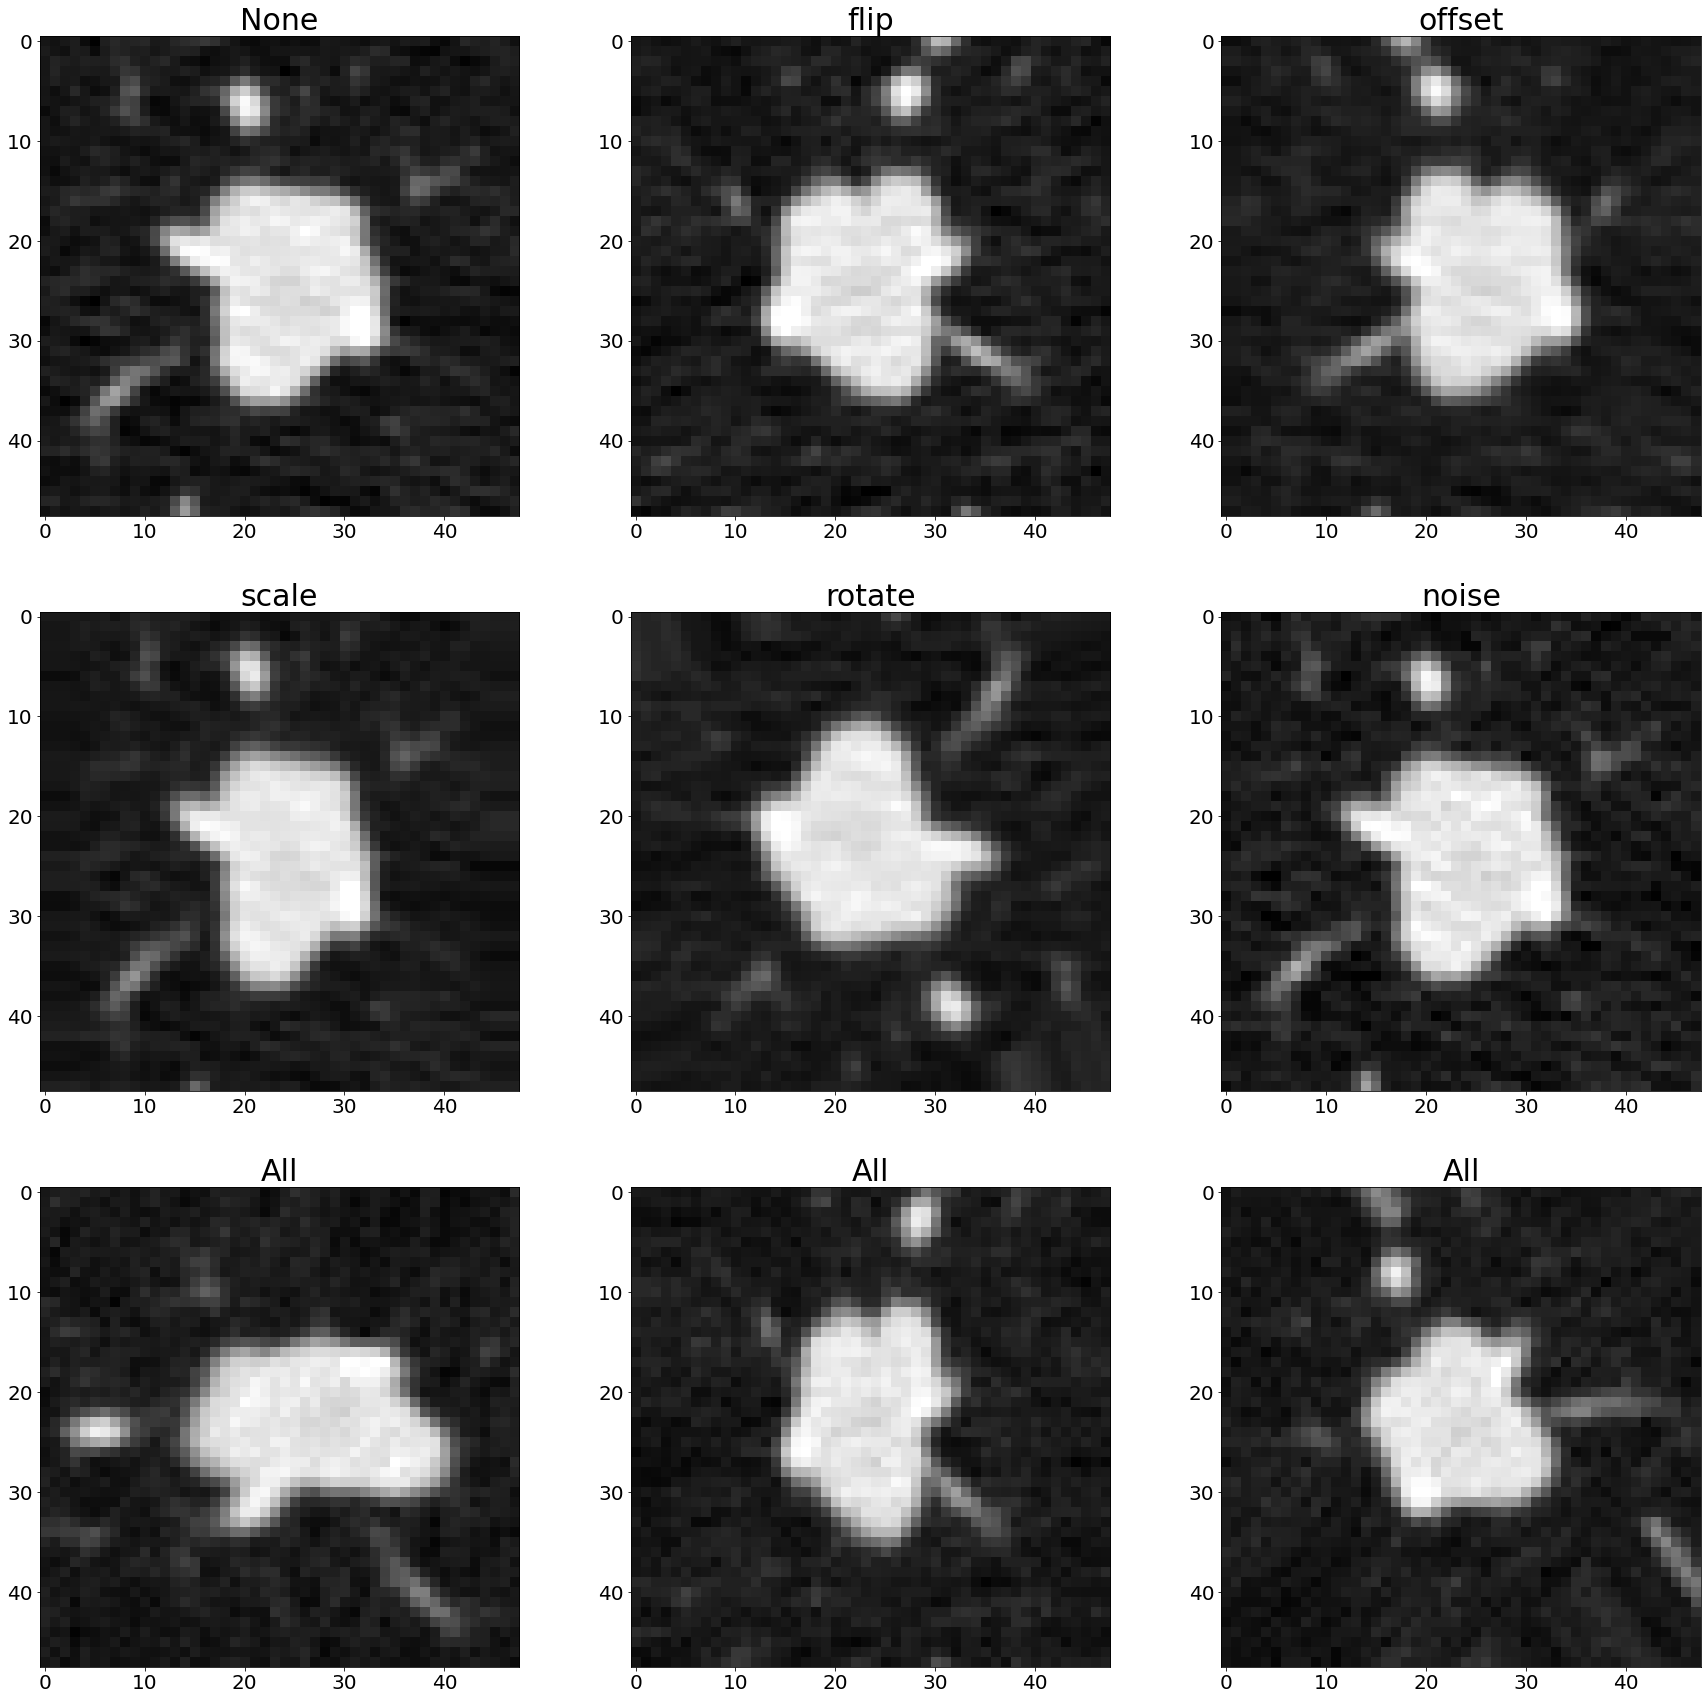

In [7]:
sample_ndx = 100
sample_ndx = 154
sample_ndx = 155


sample_tup = all_ds[sample_ndx]
print(sample_tup[0].shape, sample_tup[1:])

fig = plt.figure(figsize=(30, 30))

clim=(-1000.0, 300)

for i, ((title_str, _), ds) in enumerate(zip(augmentation_list, ds_list)):
    sample_tup = ds[sample_ndx]
    subplot = fig.add_subplot(3, 3, i+1)
    subplot.set_title(title_str, fontsize=30)
    for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
        label.set_fontsize(20)
    plt.imshow(sample_tup[0][0][16], clim=clim, cmap='gray')
    plt.savefig('augmentation.png')



In [8]:
series_uid = positiveSample_list[1][2]
showCandidate(series_uid)

2022-07-25 01:01:08,161 INFO     pid:28516 dsets_classification:295:__init__ <dsets_classification.LunaDataset object at 0x7f02c8a4da90>: 0 training samples, 0 neg, 0 pos, unbalanced ratio


IndexError: list index out of range